## Contenido de la unidad
- Conociendo Biopython
- Secuencias y sus formatos desde biopython

1. Bio.Seq

2. Archivos FASTA

3. SeqRecord

4. Archivos FASTQ

## Conociendo Biopython
### ¿Qué es Biopython?

El Proyecto Biopython es una asociación internacional de desarrolladores de Python que comparten gratuitamente herramientas para biología molecular computacional.

Básicamente, El objetivo de Biopython es facilitar al máximo el uso de Python para bioinformática mediante la creación de módulos y clases reutilizables. Las características de Biopython incluyen analizadores para varios formatos de archivo de bioinformática (BLAST, Clustalw, FASTA, Genbank, ...), acceso a servicios online (NCBI, Expasy, ...), interfaces a programas (Clustalw, DSSP, MSMS ...), una clase de secuencia estándar, modulos con métodos de clasificación (como kmeans, etc.).

<http://biopython.org/DIST/docs/tutorial/Tutorial.pdf>

El código fuente está disponible bajo la Licencia Biopython, que es extremadamente libre y compatible con casi todas las licencias del mundo.

## Instalación

Python incluye el sistema de administración de paquetes "pip" que debería permitite instalar Biopython (y su dependencia NumPy si es necesario), actualizar o desinstalar con solo un comando de terminal:

```python
pip install biopython
pip install --upgrade biopython
pip uninstall biopython
```
después entras a una sesion de python3 y verificas la version:


In [1]:
import Bio
print(Bio.__version__)

1.85


### ¿Que puedo encontrar en los paquetes de biopython?
La capacidad de analizar archivos bioinformáticos en estructuras de datos utilizables de Python, incluida la compatibilidad con los siguientes formatos:

- [Salidas de Blast](https://resources.qiagenbioinformatics.com/manuals/clcgenomicsworkbench/650/Explanation_BLAST_output.html)
- [Clustalw](https://meme-suite.org/meme/doc/clustalw-format.html)
- [FASTA](https://www.ncbi.nlm.nih.gov/genbank/fastaformat/)
- [fastq](https://es.wikipedia.org/wiki/Formato_FASTQ)
- [GenBank](https://www.ncbi.nlm.nih.gov/genbank/samplerecord/)
- [PubMed y Medline](https://support.nlm.nih.gov/kbArticle/?pn=KA-05477)
- Archivos [ExPASy](https://www.expasy.org/), como Enzyme y Prosite
- SCOP, incluidos archivos ‘dom’ y ‘lin’
- UniGene
- SwissProt

## Manejo de secuencias

Las secuencias biológicas son posiblemente el objeto central de la bioinformática, y en esta sección presentaremos el mecanismo de Biopython para tratar con secuencias, el objeto Seq. Mas adelante veremos como el Objeto SeqRecord, combina la información de secuencia con cualquier anotación.

Las secuencias son esencialmente cadenas de letras como AGTACACTGGT, que parece muy natural ya que esta es la forma más común en que las secuencias se ven en formatos de archivos biológicos. La diferencia más importante entre los objetos Seq y las cadenas estándar de Python es que tienen diferentes métodos. Aunque el objeto Seq admite muchos de los mismos métodos que una cadena simple, su método translate() difiere al realizar la traducción biológica a diferencia que en un string dicho método reemplaza un caracter por otro. También hay métodos adicionales biológicamente relevantes como reverse_complement() en el objeto Seq.

[Métodos string Métodos Bio.Seq](https://biopython.org/docs/1.75/api/Bio.Seq.html)

Función `Seq`: toma secuencia DNA|RNA|AA (string) y convierte a objeto `Seq`

In [6]:
import Bio.Seq
import gc
seqobj =  Bio.Seq.Seq('ATGCGATCGAGC')
seqobj

Seq('ATGCGATCGAGC')

In [3]:
seqstr = str(seqobj)
print(f'{seqstr} tiene {len(seqstr)} nucelótidos')

ATGCGATCGAGC tiene 12 nucelótidos


### Abreviemos
Para no tener que escribir todo el tiempo `Bio.Seq.Seq` podemos hacer:

In [7]:
from Bio.Seq import Seq
seqobj = Seq('ATGCGATCGAGC')
gc.collect()

534

Los objetos `Seq` son inmutables, por lo que no pueden ser modificados una vez que han sido transformados en objetos. Si es de nuestro interés modificar al objeto utilizamos:

In [8]:
from Bio.Seq import MutableSeq

mut_seq = MutableSeq(seqobj)
mut_seq[0] = 'T'
mut_seq

MutableSeq('TTGCGATCGAGC')

### ¿Y cómo obtengo a la secuencia complementaria?

Si venimos desde la secuencia, podemos utilizar mecanismos propios de python, tales como

In [11]:
seqstr[::-1], seqstr

('CGAGCTAGCGTA', 'ATGCGATCGAGC')

#### Para cambiar las bases y seguir siendo capaz de identificar las modificaciones

Podemos aprovecharnos de que python maneja las cadenas de forma `case sensitive`.

In [12]:
seqstr2 = seqstr.replace('A', 't').replace('T', 'a').replace('C', 'g').replace('G', 'c')
seqstr, seqstr2

('ATGCGATCGAGC', 'tacgctagctcg')

#### Utilizando BioPython

In [ ]:
seq_comp = seqobj.complement()
seq_rev = seqobj.reverse_complement()
seq_rna = seqobj.transcribe()
seq_back_rna = seqobj.back_transcribe()

### Extracción de codones

In [13]:
seqstr[:3]

'ATG'

In [14]:
import re

for codon in re.findall(r'(.{3})', str(seqstr)):
    print(codon)

ATG
CGA
TCG
AGC


### Búsqueda de patrones

Como ejemplo será el patrón `ACG`

In [16]:
from Bio import SeqUtils
pattern = Seq('ACG')

sequence = Seq(tmp:='ATGCGCGACGGCGTGATCAGCTTATAGCCGTACGACTGCTGC')
results = SeqUtils.nt_search(tmp, pattern)
print(results)

reverse_results = SeqUtils.nt_search(tmp, pattern.reverse_complement())
print(reverse_results)

['ACG', 7, 31]
['CGT', 11, 28]


# Ejercicio 1
Obtener cadena protéica de cualquiera de sus ORFs
Un ORF inicia con un codón inicial y termina, ya sea con un codón final o al final de la cádena.



Input a utilizar:
```
AGCCATGTAGCTAACTCAGGTTACATGGGGATGACCCCGCGACTTGGATTAGAGTCTCTTTTGGAATAAGCCTGAATGATCCGAGTAGCATCTCAG
```

# Objetos `SeqRecord`
`SeqIO.Parse` genera objetos `Bio.SeqRecord.SeqRecord`

Atributos principales:
- `ID`: identificador (cadena) objeto.id
- `Seq`: secuencia (objeto Seq o similar) objeto.seq

Atributos adicionales:

- `name`: Nombre de la secuencia, e.g. nombre del gen (string)
- `description`: Texto adicional (cadena)
- `dbxrefs`: Lista de referencias cruzadas de bases de datos (lista de cadenas)
- `features`: Cualquier (sub)features definidos (lista de objetos SeqFeature)
- `annotations`: Más información sobre la secuencia (dictionary). cadenas, o lista de cadenas.

# RNA-seq

Para más información véase el siguiente artículo de [nature](https://www.nature.com/articles/s41576-019-0150-2).

## FastQ

Un archivo fastq describe cada secuencia con 4 lineas, que son la siguientes:

- Linea 1: Identificador de secuencia con información sobre la secuenciación. Los contenidos de esta línea varian, basados en el software de conversión BCL a FASTQ usado, para el caso concreto de ilumina, inicia con el nombre del equipo, numero de corrida, tile,posición x y y de del tile, numero de lectura y adaptador

- Linea 2: propiamente La secuencia ( A, C, T, G y N)

- Linea 3: en las primeras versiones era una copia de la linea 1 pero iniciando con el signo de más (+). En las ultimas versiones solo tiene el signo (+)

- Puntuaciones de calidad. Estas son codificadas con Phred +33, usando caracteres ASCII para representar puntuaciones de calidad numéricas

La primer secuencia dentro de la línea uno es el `ID` del equipo de secuenciación y tiene como prefijo un `@`.


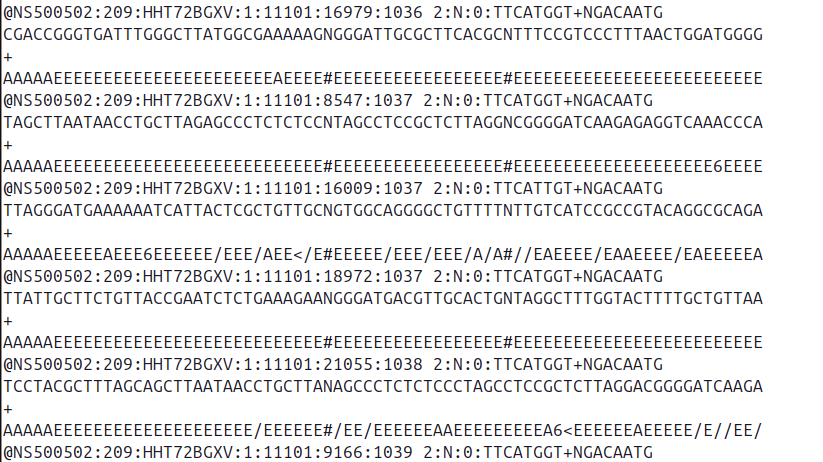

### ¿Qué significa el identificador?

- @NS500502: identificador del equipo (valor unico en el mundo)
- 209: numero de corrida
- HHT72BGXV: Identificador del Flowcell
- 1: (line) en los ultimos modelos es un numero entre 1 y 4, antes habia 8 lines en un flowcell
- 11101: Posición x en el tile
- 16979: Posición y en el tile
- 1036: Numero de tile
- 2 : numero de archivo (1 o 2)
- TTCATGGT+NGACAATG: Adaptadores

Tile: área en la que se pueden tener las secuencias y donde se hará la captura de la secuenciación.

# Descarga de datos de RNA-seq

## Pregunta
> ¿Cómo podemos acceder, explorar y descargar datos de RNA-Seq asociados a un BioProject específico (PRJNAXXX), para su posterior análisis transcriptómico, incluyendo el genoma de referencia necesario para el alineamiento de las lecturas?

## Objetivos
**General:**

> Entender el proceso de exploración y descarga de datos de RNA-Seq y del genoma de referencia desde NCBI, siguiendo la relación BioProject → GEO → GSM → SRR → Genoma, utilizando Biopython y SRA Toolkit.

## Específicos:

> 1. Comprender la estructura jerárquica de NCBI: BioProject, BioSample, GEO Series (GSE), GEO Samples (GSM) y SRA Runs (SRR).
> 2. Obtener información de un BioProject específico usando Biopython (esearch, esummary, elink).
> 3. Identificar las muestras (GSM) y sus archivos de secuenciación (SRR) asociados al proyecto.
> 4. Descargar los archivos SRR y convertirlos a formato FASTQ utilizando SRA Toolkit.
> 5. Combinar archivos de lecturas forward y reverse cuando corresponda, generando archivos finales representativos de cada muestra.
> 6. Consultar y descargar el genoma de referencia del organismo correspondiente, incluyendo secuencias y archivos de anotación (GFF), para el posterior mapeo y análisis de expresión diferencial.

## 1. Problemática: Pasilla en Drosophila melanogaster
Como vimos en clases anteriores, el proyecto que abordaremos está relacionado con la expresión del gen Pasilla. El experimento evaluó cómo la inhibición de este gen, ortólogo en Drosophila melanogaster de los genes NOVA1 y NOVA2 en mamíferos, afecta el transcriptoma. Para ello, se analizaron datos de RNA-Seq depositados en [NCBI-GEO](https://www.ncbi.nlm.nih.gov/geo/)(accesos GSM461176 a GSM461182) y asociados al BioProject [PRJNA168994](https://www.ncbi.nlm.nih.gov/bioproject/PRJNA168994), según el estudio publicado por [Brooks et al.](https://genome.cshlp.org/content/21/2/193) en Genome Research. En esta clase, nos enfocaremos en la descarga y consulta de los datos asociados al proyecto [PRJNA168994](https://www.ncbi.nlm.nih.gov/bioproject/PRJNA168994), prestando especial atención a las muestras GSM461176 a GSM461182, y revisaremos de manera general el uso de [Biopython](https://biopython.org/) y [SRA Toolkit](https://github.com/ncbi/sra-tools) para la obtención de los datos.

## 2. Conceptos clave: BioProject, BioSample, SRA y GEO
De manera general, un BioProject (PRJNAxxxxxx) describe el proyecto de investigación en su conjunto (por ejemplo, un estudio de RNA-Seq) y se vincula a una o varias BioSamples (SAMNxxxxxx), que documentan las características biológicas de cada muestra. A partir de estas BioSamples se generan los datos crudos de secuenciación, almacenados en el [Sequence Read Archive (SRA, SRRxxxxxx)](https://www.ncbi.nlm.nih.gov/sra).

En algunos casos, el proyecto también deposita información en Gene Expression Omnibus (GEO):

- Cada GSE corresponde a un experimento completo.
- Cada GSM corresponde a una muestra individual, asociada a sus archivos de secuenciación.

En resumen, la ruta BioProject → BioSample → SRA está siempre presente, mientras que la rama hacia GEO es opcional y depende del tipo de estudio.
```bash
BioProject (PRJNAxxxxxx) 
│ → describe el proyecto general (ej. un estudio de RNA-Seq) 
│ 
├── BioSample (SAMNxxxxxx) 
│ → describe las características biológicas de cada muestra 
│ 
├── SRA (SRRxxxxxx) 
│ → archivos crudos de secuenciación (FASTQ/BAM) 
│ 
└── GEO (opcional) 
    ├── GSE (Serie de GEO / Experimento) 
    │ → describe un experimento completo con diseño y condiciones 
    │ 
    └── GSM (Muestra de GEO) → muestra individual (ej. "Untreated 2") → incluye metadatos y vínculos a SRR
```

## 3. Exploración de datos en NCBI con Biopython
Antes de descargar datos, podemos obtener información general sobre un BioProject (por ejemplo, PRJNA168994) utilizando la biblioteca Biopython y sus funciones de Bio.Entrez.

- Resumen de funciones de Bio.Entrez
- `esearch`: Buscar IDs en una base de datos.
- `efetch`: Descargar información completa (texto, XML, secuencias, metadatos).
- `esummary`: Obtener un resumen de un ID (título, organismo, etc.).
- `elink`: Encontrar vínculos entre bases de datos (ej. GSE → SRA).
- `egquery`: Buscar un término en todas las bases del NCBI y ver cuántos resultados hay.
- `espell`: Corregir errores ortográficos en la búsqueda.
- `einfo`: Ver información de una base de datos (campos, descripción, qué contiene).
- `read`: convierte la respuesta de NCBI, en un objeto de python(listas, diccionarios, strings, etc.).

## 3.1 Preparación: carga de bibliotecas

Primero, importaremos la biblioteca Entrez de Biopython, que permite conectarse con las bases de datos de NCBI y utilizar funciones como esearch, efetch, esummary y elink para explorar y descargar información sobre proyectos, muestras y datos de secuenciación.

> Nota: Para acceder a las bases de datos de NCBI es necesario proporcionar una cuenta de correo electrónico al utilizar Entrez, para que el servidor pueda identificar al usuario.

In [17]:
from Bio import Entrez
import pandas as pd
from io import StringIO
import subprocess
import os

# Proporcionar correo electrónico
Entrez.email = "pablosm@lcg.unam.mx"

## 3.2 Obtener el UID de un BioProject
En NCBI no es posible acceder a un proyecto únicamente por su nombre, ya que el sistema utiliza un **identificador interno único** llamado **UID (Unique ID)** para cada registro.

Por ello, el primer paso consiste en obtener este UID utilizando la función esearch de Biopython, especificando la base de datos bioproject. Con el UID obtenido, podremos consultar toda la información asociada al proyecto.

In [27]:
project_acc = 'PRJNA877658'
handle = Entrez.esearch(db='bioproject', term=project_acc)
search_results = Entrez.read(handle)
print(search_results)
handle.close()

{'Count': '1', 'RetMax': '1', 'RetStart': '0', 'IdList': ['877658'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'PRJNA877658[All Fields]', 'Field': 'All Fields', 'Count': '1', 'Explode': 'N'}, 'GROUP'], 'QueryTranslation': 'PRJNA877658[All Fields]'}


La consulta devuelve diversos parámetros relacionados con los resultados de la búsqueda. A continuación se describen los más importantes:

==Hacer tabla==


| - | - |
| Campo |	Significado |
|Count |	Número total de resultados encontrados para la búsqueda. |
|RetMax	| Máximo de resultados devueltos en la consulta actual (por defecto 20 si no se especifica). |
RetStart	Índice del primer resultado devuelto (sirve para paginar los resultados).
IdList	Lista de identificadores únicos (UIDs) de los resultados encontrados. Estos UIDs se usan en efetch, esummary, etc.
TranslationSet	Conjunto de traducciones de términos de búsqueda que hace NCBI (ej. sinónimos o equivalencias). Puede estar vacío.
TranslationStack	Muestra paso a paso cómo NCBI interpretó tu búsqueda (ej. en qué campos buscó y cuántos resultados encontró).
QueryTranslation	Versión final de la consulta después de ser interpretada por NCBI (puede ser igual a tu búsqueda original o una forma ajustada).
Ahora, extraemos únicamente el UID del bioproject a partir del resultado de la búsqueda:

In [35]:
project_uid = search_results['IdList'][0]
print("UID del BioProject:", project_uid)

UID del BioProject: 877658


## 3.3 Resumen del BioProject
Con el UID obtenido anteriormente, podemos consultar un resumen del BioProject usando la función esummary de Biopython sobre la base de datos bioproject:

In [25]:
handle = Entrez.esummary(db = 'bioproject', id=project_uid)
project_record = Entrez.read(handle)
print(project_record)
handle.close()

{'DocumentSummarySet': DictElement({'DocumentSummary': [DictElement({'TaxId': '0', 'Project_Id': '877658', 'Project_Acc': 'PRJNA877658', 'Project_Type': 'Primary submission', 'Project_Data_Type': 'Transcriptome or Gene expression', 'Sort_By_ProjectType': '300903', 'Sort_By_DataType': '280430', 'Sort_By_Organism': '787676', 'Project_Subtype': '', 'Project_Target_Scope': 'Multispecies', 'Project_Target_Material': 'Genome', 'Project_Target_Capture': 'Whole', 'Project_MethodType': 'Sequencing', 'Project_Method': '', 'Project_Objectives_List': [{'Project_ObjectivesType': 'Raw Sequence Reads', 'Project_Objectives': ''}], 'Registration_Date': '2022/09/07 00:00', 'Project_Name': '', 'Project_Title': 'Haemonchus contortus IVM Susceptible/Resistant Mexican Transcriptome, INIFAP-Mexico', 'Project_Description': 'The trasnscriptome of two H. contortus mexican isolates (IVM Susceptible and Resistant) was assembled to analyze its potential use in the establishment of strategies of control of haemonch

### Acceso a los campos de la consulta

In [33]:
# Mostrar información del proyecto
proj = project_record['DocumentSummarySet']['DocumentSummary'][0]

# Mostrando campos del diccionario
print(proj.keys())

print('\n===== Accediendo a los campos "relevantes" =====')
print(f'Accession: {proj['Project_Acc']}')
print(f'Project Data Type: {proj['Project_Data_Type']}')
print(f'Method type: {proj['Project_MethodType']}')

dict_keys(['TaxId', 'Project_Id', 'Project_Acc', 'Project_Type', 'Project_Data_Type', 'Sort_By_ProjectType', 'Sort_By_DataType', 'Sort_By_Organism', 'Project_Subtype', 'Project_Target_Scope', 'Project_Target_Material', 'Project_Target_Capture', 'Project_MethodType', 'Project_Method', 'Project_Objectives_List', 'Registration_Date', 'Project_Name', 'Project_Title', 'Project_Description', 'Keyword', 'Relevance_Agricultural', 'Relevance_Medical', 'Relevance_Industrial', 'Relevance_Environmental', 'Relevance_Evolution', 'Relevance_Model', 'Relevance_Other', 'Organism_Name', 'Organism_Strain', 'Organism_Label', 'Sequencing_Status', 'Submitter_Organization', 'Submitter_Organization_List', 'Supergroup'])

===== Accediendo a los campos "relevantes" =====
Accession: PRJNA877658
Project Data Type: Transcriptome or Gene expression
Method type: Sequencing


## 3.4 Relacionando BioProject con GEO (GSE/GSM)
Un BioProject puede estar vinculado a varias bases de datos, como SRA (SRR/SRX), GEO (GSE/GSM) o BioSample (SRS). Con la función elink podemos consultar estas relaciones:

In [39]:
handle = Entrez.elink(dbfrom='bioproject', db='sra', id=project_uid)
linksBioProj = Entrez.read(handle)
handle.close()

print(linksBioProj)

sra_ids = [x.get('Id') for x in linksBioProj[0]['LinkSetDb'][0]['Link']]
print(sra_ids)
print(len(sra_ids))
gc.collect()

[{'LinkSetDbHistory': [], 'ERROR': [], 'LinkSetDb': [{'Link': [{'Id': '24384303'}, {'Id': '24384302'}, {'Id': '24384301'}, {'Id': '24384300'}, {'Id': '24384299'}, {'Id': '24384298'}], 'DbTo': 'sra', 'LinkName': 'bioproject_sra'}, {'Link': [{'Id': '24384303'}, {'Id': '24384302'}, {'Id': '24384301'}, {'Id': '24384300'}, {'Id': '24384299'}, {'Id': '24384298'}], 'DbTo': 'sra', 'LinkName': 'bioproject_sra_all'}], 'DbFrom': 'bioproject', 'IdList': ['877658']}]
['24384303', '24384302', '24384301', '24384300', '24384299', '24384298']
6


223